<a href="https://colab.research.google.com/github/DavidT005/CUFICO_2019_2/blob/master/MonteCarloMetropolisDavid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Motecarlo

In [0]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

In [76]:
a = 1 # lower limit
b = 10 # upper limit
c = 0
d = 2
N = 100000

def F(x):
  return 1/x**3

def G(x):
  return (x)**-0.5

def H(x,y,z):
  return (1/x)+y+z**2


I1,I2,I3=0,0,0 # var to store the integral
f_squared_storage = np.array([])
g_squared_storage = np.array([])
h_squared_storage = np.array([])


for i in range(N):
  x = (b-a)*np.random.random() +a # generates a random float between a and b
  y = (d-c)*np.random.random() +c
  z = (d-c)*np.random.random() +c

  I1 += F(x)
  f_squared_storage = np.append(f_squared_storage, F(x)**2)

  I2 += G(x)
  g_squared_storage = np.append(g_squared_storage, G(x)**2)


  I3 += H(x,y,z)
  g_squared_storage = np.append(g_squared_storage, H(x,y,z)**2)


E1 = I1
E2 = I2
E3 = I3

I1 = (I1/N)*(b-a)#Se multiplica por (b-a) para extender la integral de [0,1] a [a,b]
I2 = (I2/N)*(b-a)#Se multiplica por (b-a) para extender la integral de [0,1] a [a,b]
I3 = (I3/N)*(b-a)*(d-c)**2 #Se multiplica por (b-a)(c-d)**2 para extender la integral de [0,1] a [a,b] y dos veces de [0,1] a [c,d]


print(I1)
print(I2)
print(I3)

integrate.quad(F,1,10)
integrate.quad(G,1,10)





0.49051334938894353
4.319911871776048
93.1024116981167


(4.32455532033676, 1.6881526376757614e-09)

In [84]:
f_s_squared = np.sum(f_squared_storage- (I1** 2)) / N
g_s_squared = np.sum(g_squared_storage - (I2 ** 2)) / N
h_s_squared = np.sum(h_squared_storage - (I3 ** 2)) / N

print(f_s_squared, g_s_squared, h_s_squared)

-0.21866752109334436 -28.587695842041583 0.0


Now we use the stratified sampling

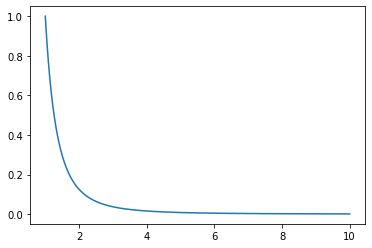

In [54]:
a = 1
b = 10
x_span = np.linspace(a,b,1000)
plt.plot(x_span,F(x_span))
plt.show()

In [55]:
I1_1 = 0
I1_2 = 0

a = 1
b = 2
N1 = 100000
for i in range(N1):
  x = (b-a)*np.random.random() +a # generates a random float between a and b
  I1_1 += F(x)
  
I1_1 = (I1_1/N1)*(b-a)


a = 2
b = 10
N2 = 1000
for i in range(N2):
  x = (b-a)*np.random.random() +a # generates a random float between a and b
  I1_2 += F(x)

I1_2 = (I1_2/N2)*(b-a)

I1 = I1_1+I1_2

print(I1)
integrate.quad(F,1,10)

0.4987608973863228


(0.4950000000000001, 3.331064937908213e-10)

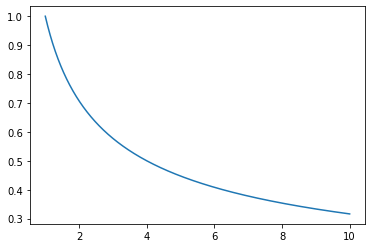

In [56]:
a = 1
b = 10
x_span = np.linspace(a,b,1000)
plt.plot(x_span,G(x_span))
plt.show()

In [57]:
I2_1 = 0
I2_2 = 0

a = 1
b = 2
N1 = 10000
for i in range(N1):
  x = (b-a)*np.random.random() +a # generates a random float between a and b
  I2_1 += G(x)

I2_1 = (I2_1/N1)*(b-a)


a = 2
b = 10
N2 = 1000
for i in range(N2):
  x = (b-a)*np.random.random() +a # generates a random float between a and b
  I2_2 += G(x)

I2_2 = (I2_2/N2)*(b-a)

I2 = I2_1+I2_2

print(I2)
integrate.quad(G,1,10)

4.321907340074979


(4.32455532033676, 1.6881526376757614e-09)

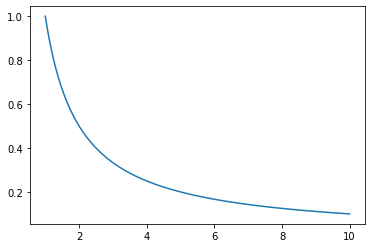

In [58]:
a = 1
b = 10
c = 0
d = 2
x_span = np.linspace(a,b,1000)
y_span = np.linspace(c,d,1000)
z_span = np.linspace(c,d,1000)
'''
As H has the form (1/x)+y+z**2 and the ranges stated above
H varies linearly with y so we use chose not to use stratified sampling to reduce the number of volume integrals to compute
H varies quadratically with z, so we can use stratified sampling in z[0,1] and z[1,2]
H varies with the inverse of x so we use stratified sampling with x[1,5] and x[5,10]
These account for two perpedicular cuts in space, resulting in four volumes of integration
'''
'''
Let's analize how much every volume adds to the total integral without considering y

vol1: x[1,5] and z[0,1] <- Adds a normal ammout
vol2: x[1,5] and z[1,2] <- Adds a great ammount
vol3: x[5,10] and z[0,1] <- Adds a little ammount
vol4: x[5,10] and z[1,2] <- Adds a normal ammount

'''
plt.plot(x_span,1/x_span)

In [0]:
I3_1 = 0
I3_2 = 0
I3_3 = 0
I3_4 = 0

#Vol1: adds a normal ammount
a = 1
b = 5
c = 0
d = 2
e = 0
f = 1
N = int(1e3)

for i in range(N):
  #print("1",i)
  x = (b-a)*np.random.random() +a # generates a random float between a and b
  y = (d-c)*np.random.random() +c
  z = (f-e)*np.random.random() +e
  I3_1 += H(x,y,z)

I3_1 = (I3_1/N)*(b-a)*(d-c)*(f-e)

#Vol2: adds a huge ammount
a = 1
b = 5
c = 0
d = 2
e = 1
f = 2
N = int(1e4)

for i in range(N):
  #print("2",i)
  x = (b-a)*np.random.random() +a # generates a random float between a and b
  y = (d-c)*np.random.random() +c
  z = (f-e)*np.random.random() +e
  I3_2 += H(x,y,z)

I3_2 = (I3_2/N)*(b-a)*(d-c)*(f-e)

#Vol3: adds a little ammount
a = 5
b = 10
c = 0
d = 2
e = 0
f = 1
N = int(1e2)

for i in range(N):
  #print("3",i)
  x = (b-a)*np.random.random() +a # generates a random float between a and b
  y = (d-c)*np.random.random() +c
  z = (f-e)*np.random.random() +e
  I3_3 += H(x,y,z)

I3_3 = (I3_3/N)*(b-a)*(d-c)*(f-e)

#Vol4: adds a normal ammount
a = 5
b = 10
c = 0
d = 2
e = 1
f = 2
N = int(1e3)

for i in range(N):
  #print("4",i)
  x = (b-a)*np.random.random() +a # generates a random float between a and b
  y = (d-c)*np.random.random() +c
  z = (f-e)*np.random.random() +e
  I3_4 += H(x,y,z)

I3_4 = (I3_4/N)*(b-a)*(d-c)*(f-e)

I3 = I3_1 + I3_2 + I3_3 + I3_4

In [60]:
I3

93.12730178645515

#Metropolis

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def PDF(theta, sigma = 0.1, mu = 0):
  return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp( -np.power((theta - mu), 2) / (2 * np.power(sigma, 2)  ))

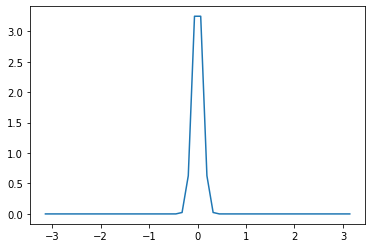

In [63]:
plt.plot(np.linspace(-np.pi, np.pi), PDF(np.linspace(-np.pi, np.pi)))
plt.show()

In [0]:
def metropolis(distro,N):
  phi_0 = np.random.random() * 2 * np.pi - np.pi
  i = 0
  thetas = np.array([])

  while (i < N):
    phi_prime = np.random.random() * 2 * np.pi - np.pi

    delta_s = -np.log(distro(phi_prime) / distro(phi_0) )

    if delta_s < 0:
      i += 1
      thetas = np.append(thetas,phi_prime)
      phi_0 = phi_prime
    
    else:
      prob = distro(phi_prime) / distro(phi_0) 
      if np.random.random() < prob :
        i += 1
        thetas = np.append(thetas,phi_prime)
        phi_0 = phi_prime

  return thetas
  

In [0]:
angles = metropolis(PDF,1000)

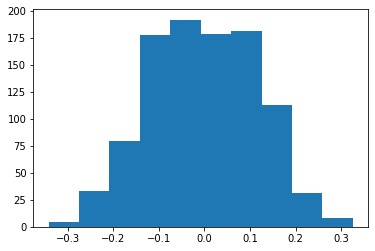

In [66]:
plt.hist(angles)
plt.show()